In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
# Loading dataset
train_df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
test_df =  pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

# Exploratory Data Analysis

In [4]:
train_df.shape

(175000, 17)

In [5]:
train_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [7]:
train_df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


# Visualizing data:

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

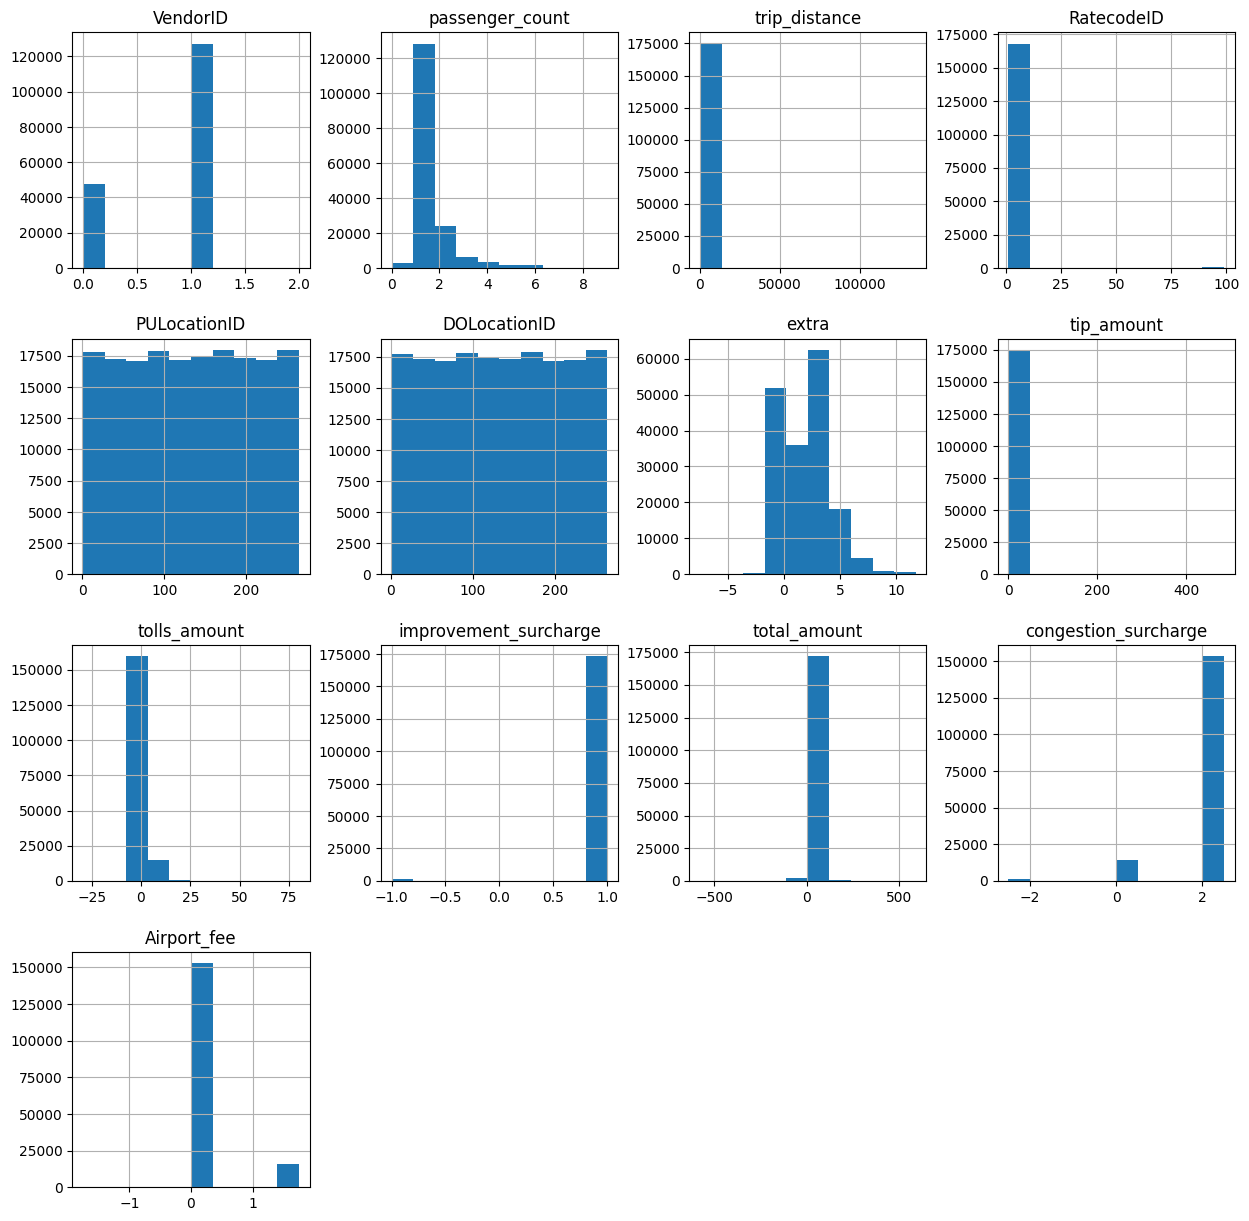

In [9]:
train_df.hist(figsize=(15,15))
plt.show()

In [10]:
print(f'Train_null :\n{train_df.isna().sum()}')

Train_null :
VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64


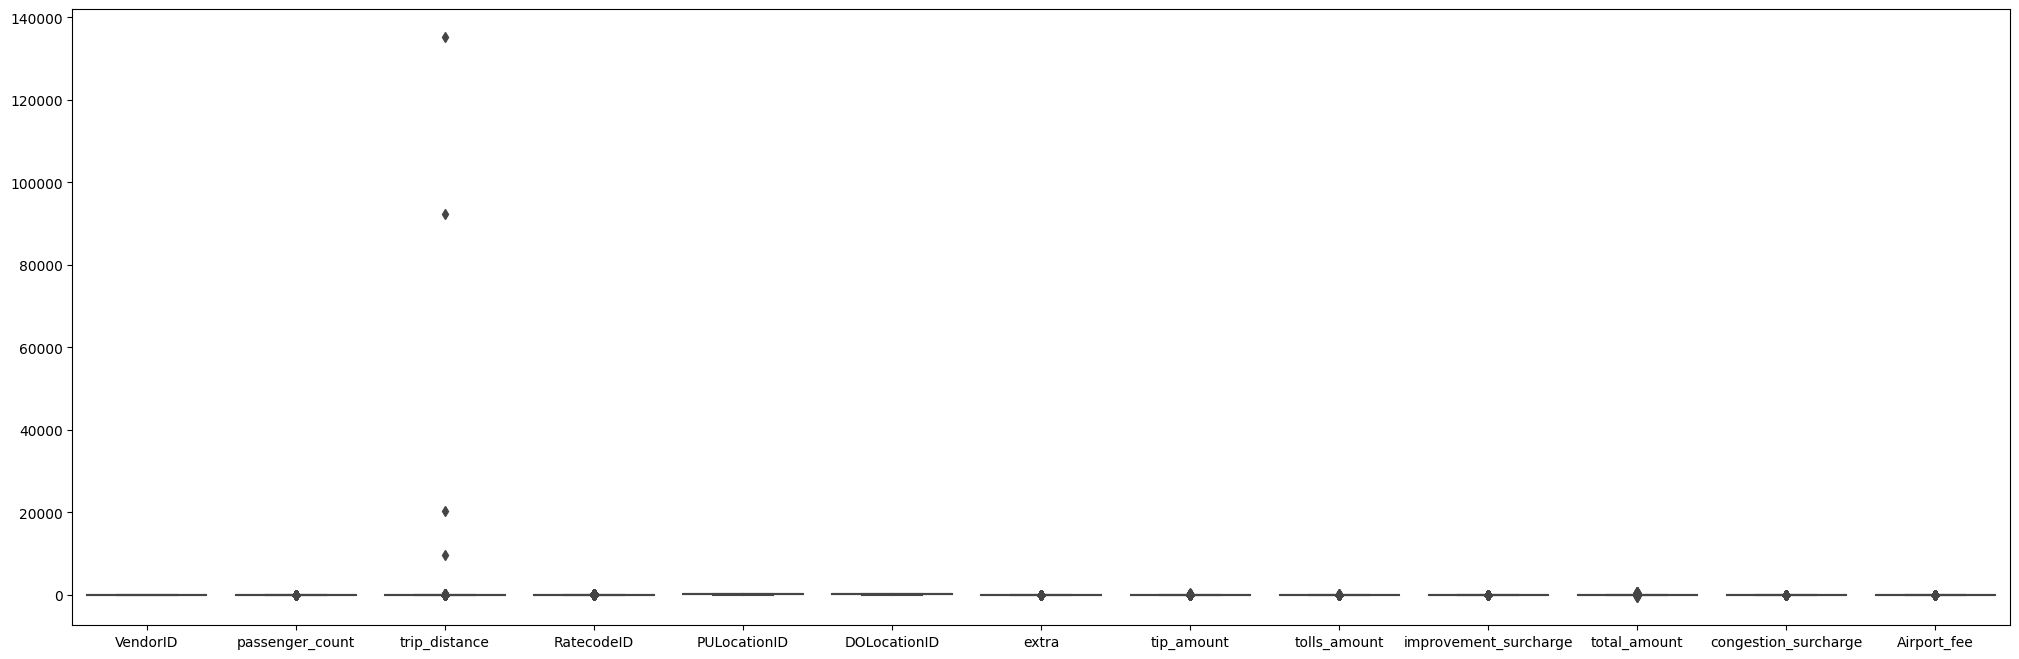

In [11]:
plt.figure(figsize=(25,8))
sns.boxplot(data=train_df)
plt.show()

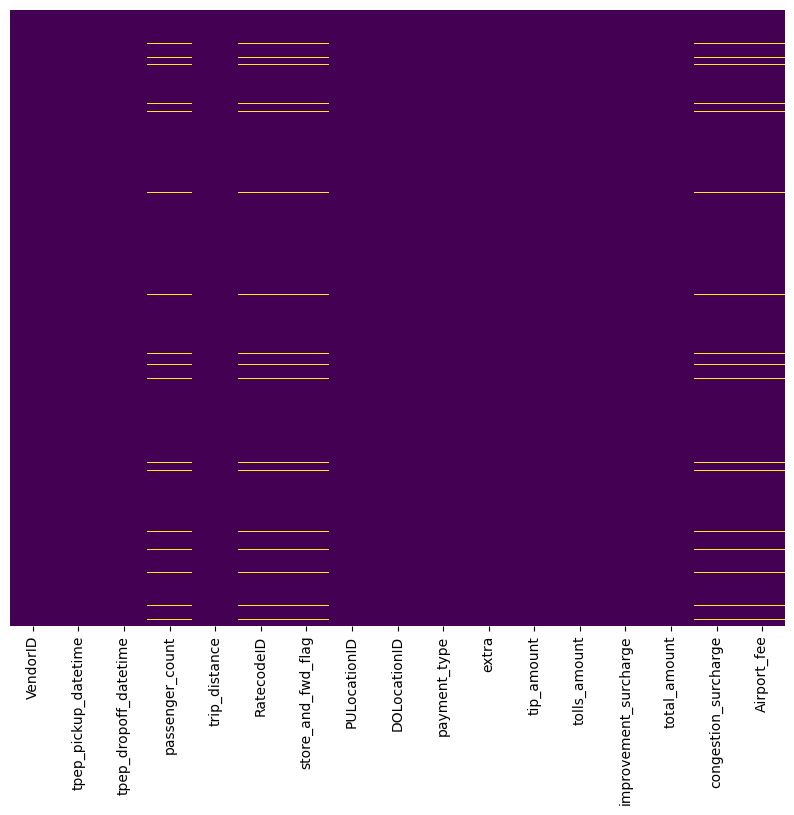

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [13]:
for_corr = train_df.select_dtypes(include=[np.int64, np.float64])

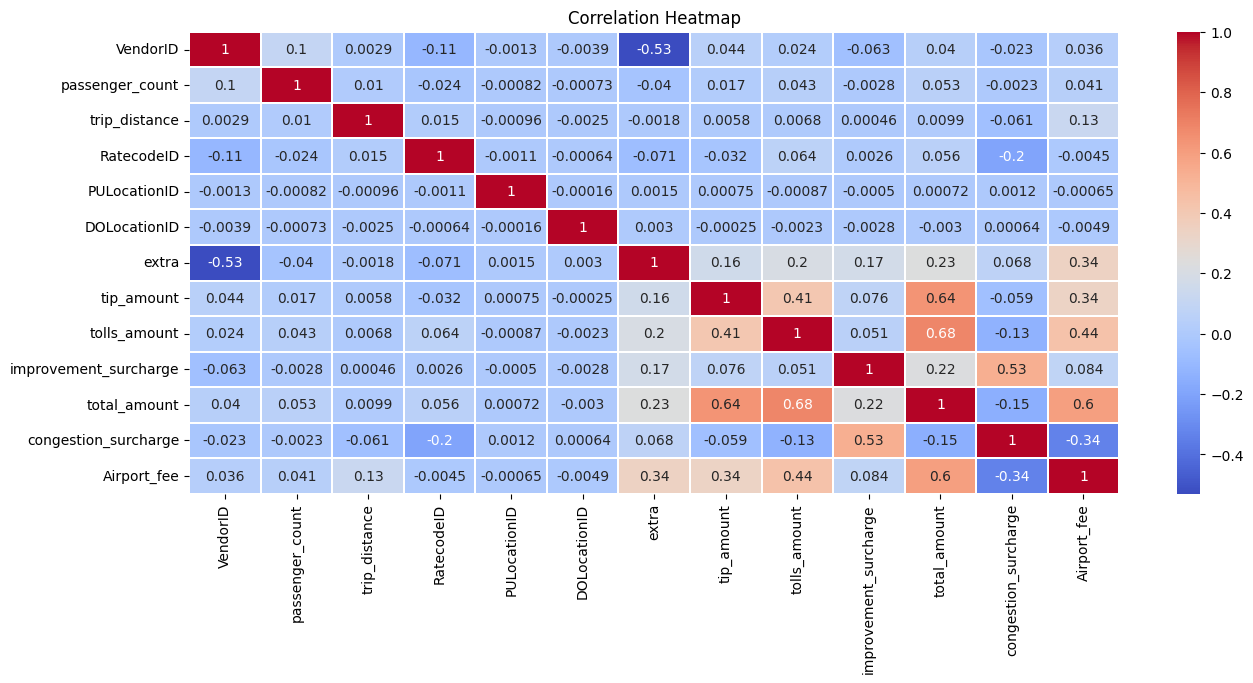

In [14]:
correlation_matrix = for_corr.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.2)
plt.title('Correlation Heatmap')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


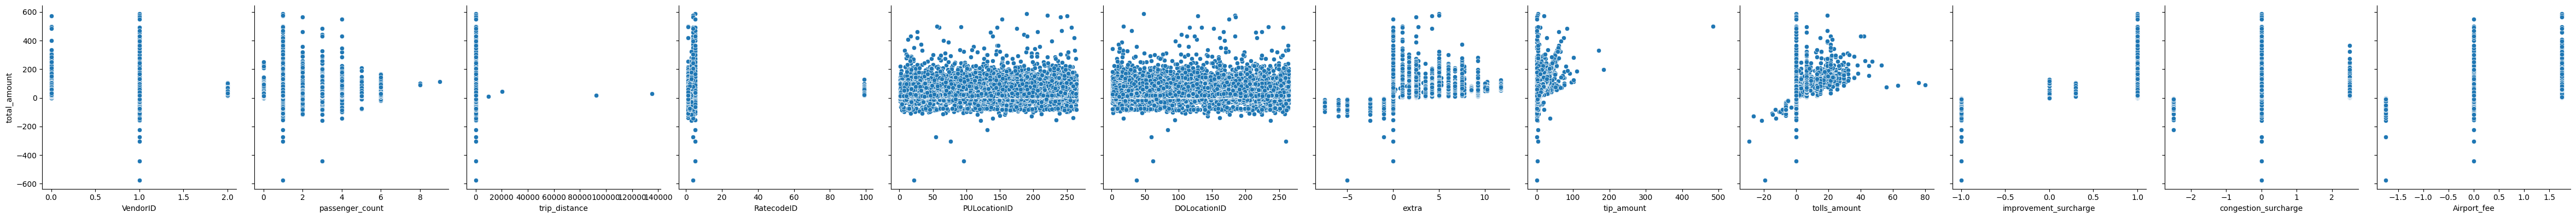

In [15]:
sns.pairplot(for_corr, x_vars=['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'extra', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'congestion_surcharge',
       'Airport_fee'], y_vars=['total_amount'], kind='scatter', height=4)
plt.show()

## Data Preprocessing

For Training data

# Convert the 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' columns to datetime format
train_df['tpep_pickup_datetime'] = pd.to_datetime(train_df['tpep_pickup_datetime'])
train_df['tpep_dropoff_datetime'] = pd.to_datetime(train_df['tpep_dropoff_datetime'])

Remark: decreased teh accuracy

# Calculate the duration of each trip in minutes
train_df['duration_min'] = ((((train_df['tpep_dropoff_datetime'] - train_df['tpep_pickup_datetime']).dt.total_seconds()).abs()) / 60).round(2)


In [16]:
train_df.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis=1, inplace=True)

In [17]:
X_train = train_df.drop('total_amount', axis=1)

In [18]:
y_train = train_df['total_amount']

For Test data

# Convert the 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' columns to datetime format
test_df['tpep_pickup_datetime'] = pd.to_datetime(test_df['tpep_pickup_datetime'])
test_df['tpep_dropoff_datetime'] = pd.to_datetime(test_df['tpep_dropoff_datetime'])

# Calculate the duration of each trip in minutes
test_df['duration_min'] = ((((test_df['tpep_dropoff_datetime'] - test_df['tpep_pickup_datetime']).dt.total_seconds()).abs()) / 60).round(2)

In [19]:
test_df.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis=1, inplace=True)

In [20]:
test_df

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.00
1,1,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.00
2,1,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.00
3,0,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.00
4,1,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1.0,0.61,1.0,N,48,72,Credit Card,2.5,4.043482,0.0,1.0,2.5,0.00
49996,1,1.0,5.02,1.0,N,57,103,Cash,1.0,2.895882,0.0,1.0,0.0,1.75
49997,1,1.0,1.92,1.0,N,150,78,Credit Card,1.0,5.636590,0.0,1.0,2.5,0.00
49998,0,1.0,5.40,1.0,N,4,154,Credit Card,3.5,7.293144,0.0,1.0,2.5,0.00


Importing Pipelines and Preprocessing methods

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

In [22]:
from sklearn.preprocessing import OrdinalEncoder

Making a numerical transformers pipeline

In [23]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', MinMaxScaler())
])

Making a categorical imputing and encoding pipeline

In [24]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder()) 
])

In [25]:
num_features = ['VendorID','passenger_count','trip_distance','RatecodeID','PULocationID','DOLocationID','extra','tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','Airport_fee']
cat_features = ['store_and_fwd_flag','payment_type']

Overall Transformer for our dataset

In [26]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

In [27]:
numeric_column_names = num_features
categorical_column_names = cat_features

cols = numeric_column_names + categorical_column_names

In [28]:
x_transformed = preprocessor.fit_transform(train_df)

In [29]:
X_trans = pd.DataFrame(x_transformed,columns = cols)

In [30]:
X_trans

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,store_and_fwd_flag,payment_type
0,0.5,0.111111,0.000016,0.0,0.452471,0.030418,0.519481,0.014778,0.26807,1.0,1.0,0.5,0.0,1.0
1,0.0,0.111111,0.000020,0.0,0.053232,0.813688,0.571429,0.012513,0.26807,1.0,1.0,0.5,0.0,1.0
2,0.5,0.111111,0.000009,0.0,0.631179,0.844106,0.389610,0.008479,0.26807,1.0,1.0,0.5,0.0,1.0
3,0.0,0.111111,0.000003,0.0,0.482890,0.904943,0.519481,0.013222,0.26807,1.0,1.0,0.5,0.0,1.0
4,0.5,0.333333,0.000008,0.0,0.768061,0.193916,0.441558,0.009836,0.26807,1.0,1.0,0.5,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,0.5,0.333333,0.000026,0.0,0.555133,0.631179,0.441558,0.018010,0.26807,1.0,1.0,0.5,0.0,1.0
174996,0.5,0.111111,0.000070,0.0,0.581749,0.722433,0.649351,0.000584,0.26807,1.0,1.0,1.0,0.0,0.0
174997,0.0,0.111111,0.000018,0.0,0.634981,0.399240,0.519481,0.008755,0.26807,1.0,1.0,0.5,0.0,1.0
174998,0.5,0.111111,0.000035,0.0,0.908745,0.376426,0.519481,0.021613,0.26807,1.0,1.0,0.5,0.0,1.0


In [31]:
X_trans.isna().sum()

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
extra                    0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
congestion_surcharge     0
Airport_fee              0
store_and_fwd_flag       0
payment_type             0
dtype: int64

## Random Forest Regression

Importing model

In [32]:
from sklearn.ensemble import RandomForestRegressor

Importing splitting mathod to split dataset in training and validation set

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X_trans,y_train, test_size=0.2,random_state=69)

In [35]:
model_Rf = RandomForestRegressor(random_state=42)
model_Rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
train_score_RF = model_Rf.score(X_train, y_train)
val_score_RF= model_Rf.score(X_val, y_val)

In [37]:
train_score_RF

0.9912840403737216

In [38]:
val_score_RF

0.9412063065895812

In [39]:
test_df.isna().sum()

VendorID                    0
passenger_count          1779
trip_distance               0
RatecodeID               1779
store_and_fwd_flag       1779
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     1779
Airport_fee              1779
dtype: int64

In [40]:
X_test_trans = preprocessor.transform(test_df)

In [41]:
test_df_rf=pd.DataFrame(X_test_trans, columns=['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID'
       , 'PULocationID', 'DOLocationID',
       'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'Airport_fee','store_and_fwd_flag','payment_type'])

In [42]:
test_df_rf

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,store_and_fwd_flag,payment_type
0,0.5,0.111111,0.000037,0.0,0.072243,0.007605,0.441558,0.012514,0.26807,1.0,1.0,0.5,0.0,1.0
1,0.5,0.111111,0.000016,0.0,0.030418,0.304183,0.519481,0.012769,0.26807,1.0,1.0,0.5,0.0,1.0
2,0.5,0.111111,0.000007,0.0,0.346008,0.338403,0.519481,0.008216,0.26807,1.0,1.0,0.5,0.0,0.0
3,0.0,0.111111,0.000006,0.0,0.068441,0.384030,0.571429,0.014105,0.26807,1.0,1.0,0.5,0.0,1.0
4,0.5,0.111111,0.000030,0.0,0.494297,0.866920,0.389610,0.003029,0.26807,1.0,0.5,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.5,0.111111,0.000005,0.0,0.178707,0.269962,0.519481,0.008339,0.26807,1.0,1.0,0.5,0.0,1.0
49996,0.5,0.111111,0.000037,0.0,0.212928,0.387833,0.441558,0.005972,0.26807,1.0,0.5,1.0,0.0,0.0
49997,0.5,0.111111,0.000014,0.0,0.566540,0.292776,0.441558,0.011625,0.26807,1.0,1.0,0.5,0.0,1.0
49998,0.0,0.111111,0.000040,0.0,0.011407,0.581749,0.571429,0.015041,0.26807,1.0,1.0,0.5,0.0,1.0


In [43]:
test_df_rf.shape

(50000, 14)

In [44]:
prediction = model_Rf.predict(test_df_rf)

In [45]:
output = pd.DataFrame({'ID': np.arange(1,50001), 'total_amount': prediction})

In [46]:
output.to_csv("submission.csv", index=False)